In [1]:
import glob
import cv2

In [2]:
import numpy as np

In [3]:
import tensorflow as tf
import tensorflow

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=5,
        horizontal_flip=True,
        fill_mode='nearest')

### Выбираем размер изображений

In [7]:
img_rows, img_cols = 110, 110
input_shape = (img_rows, img_cols, 1)

### Загружаем набор данных

In [8]:
labels = []
images = []

for image_name in glob.glob('/content/i/*.jpg'):
    items = image_name.rsplit('/',1)[1].split('_')

    label = items[0]
    if(label == "good"):
      classification = 1
    else:
      classification = 0
    labels.append(classification)
    image = cv2.imread(image_name)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.resize(gray_image,(img_rows, img_cols), interpolation = cv2.INTER_CUBIC)
    gray_image = gray_image.reshape((img_rows, img_cols, 1))
    images.append(gray_image)

labels = np.array(labels)
images = np.array(images)

In [9]:
#нормализация изображений
images = images / 255.0

In [10]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [11]:
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

### Создаём модель

In [21]:
#Моя модель
from tensorflow.keras import layers
from tensorflow.keras import regularizers
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (2, 2), activation='relu'))
model.add(Conv2D(128, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (2, 2), activation='relu'))
model.add(Conv2D(256, (2, 2), activation='relu'))
model.add(Conv2D(256, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (2, 2), activation='relu'))
model.add(Conv2D(256, (2, 2), activation='relu'))
model.add(Conv2D(256, (2, 2), activation='relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 109, 109, 32)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 108, 108, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 53, 53, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 52, 52, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 25, 25, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 24, 24, 128)         │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 11, 11, 256)         │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 10, 10, 256)         │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 9, 9, 256)           │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 3, 3, 256)           │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 2, 2, 256)           │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 1, 1, 256)           │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 300)                 │         153,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             602 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 1,856,966 (7.08 MB)

 Trainable params: 1,856,966 (7.08 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.AdamW(learning_rate=0.00025, weight_decay=0.004, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
              metrics=['accuracy'])

### Обучаем модель

In [23]:
batch_size = 64
epochs = 75

In [24]:
history_callback =  model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                                        epochs=epochs,
                                        validation_data=(X_test, y_test))

Epoch 1/75
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 658ms/step - accuracy: 0.7338 - loss: 0.6733 - val_accuracy: 0.7063 - val_loss: 0.7341
Epoch 2/75
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.7390 - loss: 0.6177 - val_accuracy: 0.7063 - val_loss: 0.6148
Epoch 3/75
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7339 - loss: 0.6000 - val_accuracy: 0.7063 - val_loss: 0.6061
Epoch 4/75
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7456 - loss: 0.5749 - val_accuracy: 0.7063 - val_loss: 0.6033
Epoch 5/75
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6889 - loss: 0.6295 - val_accuracy: 0.7063 - val_loss: 0.6055
Epoch 6/75
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7298 - loss: 0.5884 - val_accuracy: 0.7063 - val_loss: 0.6114
Epoch 7/75
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7488 - loss: 0.5631 - val_accuracy: 0.7063 - val_loss: 0.6047
Epoch 8/75
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7474 - loss: 0.5775 - val_accuracy: 0.7063 - val_loss: 0.605

In [25]:
loss_history = history_callback.history["loss"]
val_loss_history = history_callback.history["val_loss"]
accuracy = history_callback.history["accuracy"]
val_accuracy = history_callback.history["val_accuracy"]

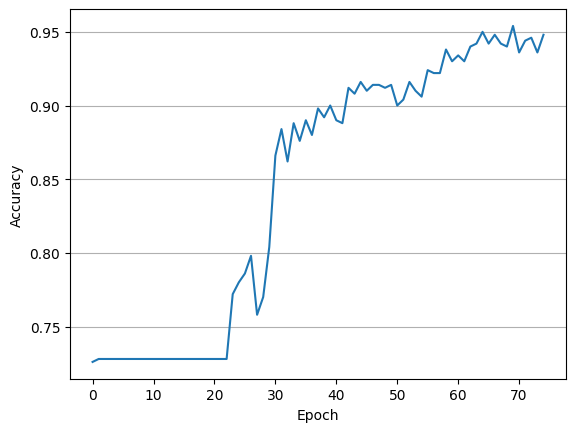

In [26]:
plt.plot(accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True, axis='y')
plt.show()

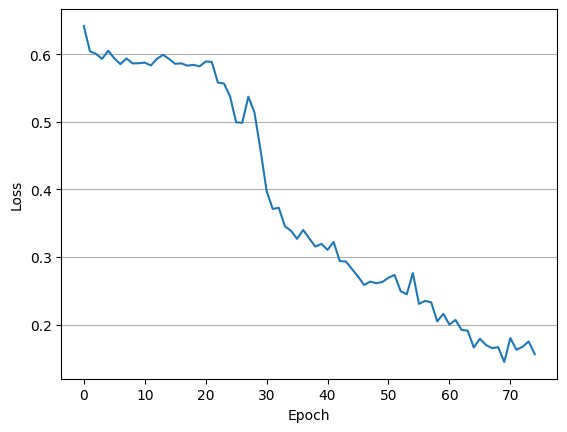

In [27]:
plt.plot(loss_history)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True, axis='y')
plt.show()

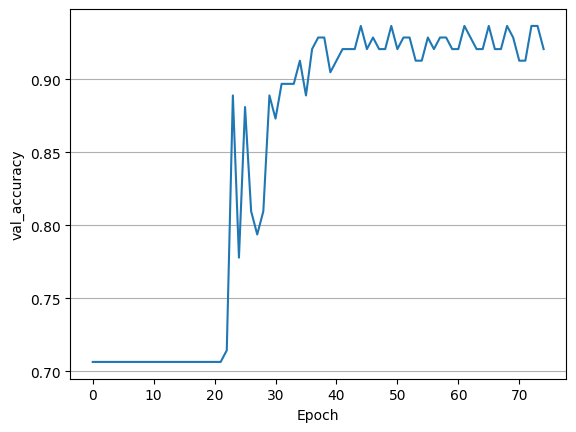

In [28]:
plt.plot(val_accuracy)
plt.ylabel('val_accuracy')
plt.xlabel('Epoch')
plt.grid(True, axis='y')
plt.show()

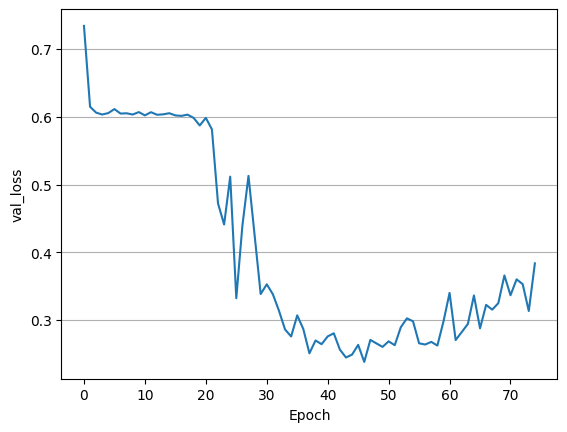

In [29]:
plt.plot(val_loss_history)
plt.ylabel('val_loss')
plt.xlabel('Epoch')
plt.grid(True, axis='y')
plt.show()

### Смотрим на предсказания

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 989ms/step
[0.977814   0.02218594]
[1. 0.]


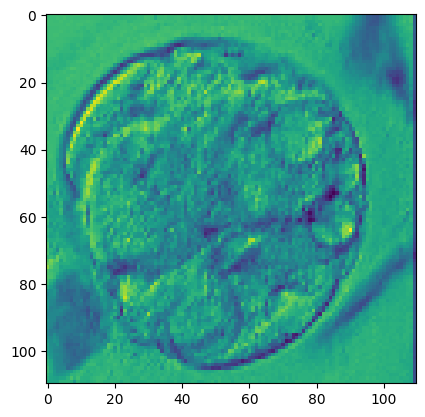

In [30]:
img_idx = 54
p_age = model.predict(np.array([X_test[img_idx]]))
print(p_age[0])
print(y_test[img_idx])
plt.imshow(X_test[img_idx].reshape(img_cols, img_rows))
plt.show()

In [31]:
!pip install git+https://github.com/paulgavrikov/visualkeras --upgrade

  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-g2n97nx3
  Running command git clone --filter=blob:none --quiet https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-g2n97nx3
  Resolved https://github.com/paulgavrikov/visualkeras to commit 3cb339c3fbd7e96f9764a4c1d0966fd403510f3b
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 50.5 MB/s eta 0:00:00
  Created wheel for visualkeras: filename=visualkeras-0.1.3-py3-none-any.whl size=16304 sha256=358954b2f6428b900ff971aba79ab53c800941975cb4a7cff674bb5a979bb278
  Stored in directory: /tmp/pip-ephem-wheel-cache-r3wdh2vv/wheels/89/d3/c2/937382b33c09192fc84331bbc02c4565d62aeae67e9684c37e
Successfully built visualkeras


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


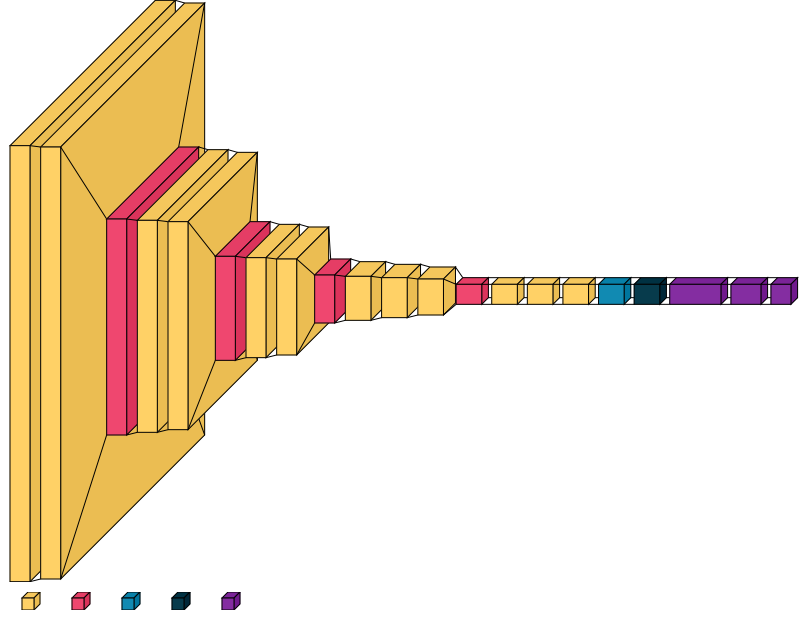

In [33]:
import visualkeras
from PIL import ImageFont

 # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font_color="#000000")